In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [88]:
pandemic_data = pd.read_csv('dataset/transformed_pandemic_data.csv')
pandemic_data.head(10)

,Unnamed: 0,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,0,AFG,Afghanistan,2019-12-31,0,0,0.0,38928341,1803.987,0.498
1,1,AFG,Afghanistan,2020-01-01,0,0,0.0,38928341,1803.987,0.498
2,2,AFG,Afghanistan,2020-01-02,0,0,0.0,38928341,1803.987,0.498
3,3,AFG,Afghanistan,2020-01-03,0,0,0.0,38928341,1803.987,0.498
4,4,AFG,Afghanistan,2020-01-04,0,0,0.0,38928341,1803.987,0.498
5,5,AFG,Afghanistan,2020-01-05,0,0,0.0,38928341,1803.987,0.498
6,6,AFG,Afghanistan,2020-01-06,0,0,0.0,38928341,1803.987,0.498
7,7,AFG,Afghanistan,2020-01-07,0,0,0.0,38928341,1803.987,0.498
8,8,AFG,Afghanistan,2020-01-08,0,0,0.0,38928341,1803.987,0.498
9,9,AFG,Afghanistan,2020-01-09,0,0,0.0,38928341,1803.987,0.498


In [105]:
pandemic_data.shape

(50418, 10)

In [90]:
# Rename columns
pandemic_data = pandemic_data.rename(columns = {'location':'loc', 'stringency_index': 'SI', 'population': 'pop', 'gdp_per_capita':'GDP', 'human_development_index': 'HDI'})
pandemic_data.columns

Index(['Unnamed: 0', 'iso_code', 'loc', 'date', 'total_cases', 'total_deaths',
       'SI', 'pop', 'GDP', 'HDI'],
      dtype='object')

In [126]:
# Filter out India's data

india_pandemic_data = pandemic_data.loc[pandemic_data['loc'] == 'Brazil']
india_pandemic_data

,Unnamed: 0,iso_code,loc,date,total_cases,total_deaths,SI,pop,GDP,HDI
6571,6571,BRA,Brazil,2019-12-31,0,0,0.00,212559409,14103.452,0.759
6572,6572,BRA,Brazil,2020-01-01,0,0,0.00,212559409,14103.452,0.759
6573,6573,BRA,Brazil,2020-01-02,0,0,0.00,212559409,14103.452,0.759
6574,6574,BRA,Brazil,2020-01-03,0,0,0.00,212559409,14103.452,0.759
6575,6575,BRA,Brazil,2020-01-04,0,0,0.00,212559409,14103.452,0.759
...,...,...,...,...,...,...,...,...,...,...
6860,6860,BRA,Brazil,2020-10-15,5140863,151747,72.22,212559409,14103.452,0.759
6861,6861,BRA,Brazil,2020-10-16,5169386,152460,72.22,212559409,14103.452,0.759
6862,6862,BRA,Brazil,2020-10-17,5200300,153214,72.22,212559409,14103.452,0.759
6863,6863,BRA,Brazil,2020-10-18,5224362,153675,72.22,212559409,14103.452,0.759


In [127]:
index_names = india_pandemic_data[(india_pandemic_data['SI'] == 0.0) & (india_pandemic_data['total_deaths'] == 0) & (india_pandemic_data['total_cases'] == 0)].index
india_pandemic_data.drop(index_names, inplace = True)

/Users/aninditasom/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [128]:
india_pandemic_data

,Unnamed: 0,iso_code,loc,date,total_cases,total_deaths,SI,pop,GDP,HDI
6600,6600,BRA,Brazil,2020-01-29,0,0,5.56,212559409,14103.452,0.759
6601,6601,BRA,Brazil,2020-01-30,0,0,5.56,212559409,14103.452,0.759
6602,6602,BRA,Brazil,2020-01-31,0,0,5.56,212559409,14103.452,0.759
6603,6603,BRA,Brazil,2020-02-01,0,0,5.56,212559409,14103.452,0.759
6604,6604,BRA,Brazil,2020-02-02,0,0,5.56,212559409,14103.452,0.759
...,...,...,...,...,...,...,...,...,...,...
6860,6860,BRA,Brazil,2020-10-15,5140863,151747,72.22,212559409,14103.452,0.759
6861,6861,BRA,Brazil,2020-10-16,5169386,152460,72.22,212559409,14103.452,0.759
6862,6862,BRA,Brazil,2020-10-17,5200300,153214,72.22,212559409,14103.452,0.759
6863,6863,BRA,Brazil,2020-10-18,5224362,153675,72.22,212559409,14103.452,0.759


### Regression variable -
    y is dependant
    x is independant

In [129]:
x = india_pandemic_data['SI']
y1 = india_pandemic_data['total_cases']
# y2 = india_pandemic_data['total_deaths']

### create a scatter plot to figure out the if there is a linear relationship between the two variables

In [130]:
x

6600     5.56
6601     5.56
6602     5.56
6603     5.56
6604     5.56
        ...  
6860    72.22
6861    72.22
6862    72.22
6863    72.22
6864    72.22
Name: SI, Length: 265, dtype: float64

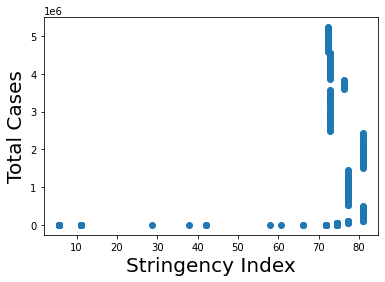

In [131]:

plt.scatter(x,y1)
# plt.scatter(log_x, log_y)
plt.xlabel("Stringency Index",fontsize=20)
plt.ylabel("Total Cases", fontsize=20)
# plt.ylabel()
plt.show()

#### Model Validation

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(log_x,log_y, test_size=0.2, shuffle=True)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

print(x_train)
print(y_train)

[[4.35388433]
 [4.08966697]
 [2.32140685]
 [4.60517019]
 [4.56746832]
 [4.39469604]
 [4.26028264]
 [4.35388433]
 [4.35388433]
 [4.29878089]
 [4.60517019]
 [4.56746832]
 [4.40598727]
 [4.37739091]
 [4.35388433]
 [2.32140685]
 [4.39469604]
 [4.30501059]
 [3.29026582]
 [4.37739091]
 [2.32140685]
 [4.39469604]
 [4.37739091]
 [4.3358518 ]
 [4.60517019]
 [2.32140685]
 [4.40598727]
 [4.40598727]
 [4.37159744]
 [4.60517019]
 [4.3358518 ]
 [4.40598727]
 [2.32140685]
 [4.29878089]
 [4.3358518 ]
 [4.29878089]
 [3.66073715]
 [4.29878089]
 [4.60517019]
 [2.32140685]
 [4.3358518 ]
 [3.29026582]
 [4.37739091]
 [4.37739091]
 [4.37159744]
 [4.60517019]
 [2.32140685]
 [4.29878089]
 [4.46095334]
 [4.37159744]
 [4.32360271]
 [4.56746832]
 [4.37739091]
 [4.32360271]
 [2.32140685]
 [4.35388433]
 [4.39469604]
 [4.37739091]
 [4.60517019]
 [4.35388433]
 [2.32140685]
 [4.29878089]
 [4.32360271]
 [3.87432114]
 [4.56746832]
 [2.32140685]
 [4.37739091]
 [4.37159744]
 [4.37159744]
 [4.60517019]
 [2.32140685]
 [4.29

In [134]:
# model.fit(x_train, y_train)

In [ ]:
# model.coef_

In [ ]:
# model.score(x_train, y_train)

Fitting the dataset into Linear Regression Model

In [135]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# calculated co-efficients
regressor.coef_

In [112]:
# predicting
y_pred= regressor.predict(x_test) 
y_pred

In [ ]:
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

# Feature Selection using correlation

In [113]:
# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')

In [114]:
# learn relationship from training data
f_selector.fit(x_train, y_train)

/Users/aninditasom/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SelectKBest(k='all', score_func=<function f_regression at 0x1215b0ca0>)

In [100]:
# transform train input data
x_train_fs = f_selector.transform(x_train)
# transform test input data
x_test_fs = f_selector.transform(x_test)

In [101]:
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

AttributeError: module 'matplotlib' has no attribute 'bar'